In [1]:
from Functions import*


In [2]:
test_list_covid, train_list_covid,val_list_covid=create_list_to_load(covid=True)

test_list_Noncovid, train_list_Noncovid,val_list_Noncovid=create_list_to_load(covid=False)

In [3]:
test_covid_labels=create_list_labels(test_list_covid,covid=True)
train_covid_labels=create_list_labels(train_list_covid,covid=True)
val_covid_labels=create_list_labels(val_list_covid,covid=True)

test_Noncovid_labels=create_list_labels(test_list_Noncovid,covid=False)
train_Noncovid_labels=create_list_labels(train_list_Noncovid,covid=False)
val_Noncovid_labels=create_list_labels(val_list_Noncovid,covid=False)

In [4]:
test_list,test_labels=concatenate_lists_and_labels(test_list_covid,test_covid_labels,test_list_Noncovid,test_Noncovid_labels)
train_list,train_labels=concatenate_lists_and_labels(train_list_covid,train_covid_labels,train_list_Noncovid,train_Noncovid_labels)
val_list,val_labels=concatenate_lists_and_labels(val_list_covid,val_covid_labels,val_list_Noncovid,val_Noncovid_labels)

In [5]:
test_list,test_labels=shuffle_lists(test_list, test_labels)
train_list,train_labels=shuffle_lists(train_list, train_labels)
val_list,val_labels=shuffle_lists(val_list, val_labels)



In [6]:
#the article precises the size of the images as (480,480)

img_w,img_h,img_ch=480,480,1

test_set=load_data(test_list,img_w,img_h,img_ch)
train_set=load_data(train_list,img_w,img_h,img_ch)
val_set=load_data(val_list,img_w,img_h,img_ch)

test_labels=np.array(test_labels)
train_labels=np.array(train_labels)
val_labels=np.array(val_labels)


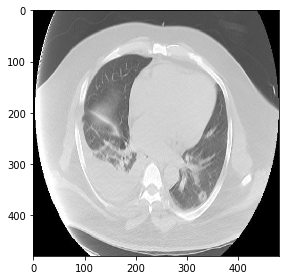

In [7]:
imshow(np.squeeze(val_set[0]))

In [9]:
INPUT_SHAPE=480,480,1
N_CLASSES=1

K.clear_session()
my_model=resnet(INPUT_SHAPE,N_CLASSES)
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 480, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 240, 64) 3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v2 (BatchNo (None, 240, 240, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 240, 240, 64) 0           batch_normalization_v2[0][0]     
______________________________________________________________________________________________

In [10]:
learning_rate=0.00001
optimizer=Adam(learning_rate)
batch_size=16
loss_function = 'binary_crossentropy'
metrics=['binary_accuracy',precision,recall]
n_epochs=100

In [11]:
#data augmentation
dictionary_augmentation = dict(
                     rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,       
                     horizontal_flip=True,
                     brightness_range=[0,2])


In [12]:
 STEP_SIZE_TRAIN=len(train_set)//batch_size

In [13]:
train_generator=augmentation(train_set,train_labels,dictionary_augmentation,batch_size=batch_size)

In [14]:
my_model.compile(loss=loss_function,optimizer = optimizer,metrics=['binary_accuracy'])

In [ ]:
model_hist=my_model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=(train_set,train_labels)
                        ,epochs=n_epochs,verbose=1)

Epoch 1/100


In [ ]:
loss_curves_plot(model_hist)

In [ ]:
accuracy_curves_plot(model_hist,'binary_accuracy')